In [174]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# 15.1 대학순위

In [258]:
# 유사한 레코드로부터 결측값 추정
# 결측값 없는 레코드 군집화 -> 결측값이 있는 레코드에 가장 가까운 군집 찾기

### a

In [279]:
univ = pd.read_csv('Universities.csv')
univ.set_index('College Name', inplace=True)

In [274]:
univ_d=univ.dropna()
univ_d.head(3)

,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
Birmingham-Southern College,AL,2,805.0,588.0,287.0,67.0,88.0,1376.0,207.0,11660.0,11660.0,2050.0,2430.0,120.0,400.0,900.0,74.0,14.0,72.0


### b

In [275]:
# 완전연결법과 유클리드 거리 사용 -> 계층적 군집화 실행 
# 변수 정규화 필요 
# 몇 개의 군집이 합리적

In [276]:
len(univ_d.columns)

19

In [263]:
univ_d.info() # state, public(1) / private(2)

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, Alaska Pacific University to University of Wyoming
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     471 non-null    object 
 1   Public (1)/ Private (2)   471 non-null    int64  
 2   # appli. rec'd            471 non-null    float64
 3   # appl. accepted          471 non-null    float64
 4   # new stud. enrolled      471 non-null    float64
 5   % new stud. from top 10%  471 non-null    float64
 6   % new stud. from top 25%  471 non-null    float64
 7   # FT undergrad            471 non-null    float64
 8   # PT undergrad            471 non-null    float64
 9   in-state tuition          471 non-null    float64
 10  out-of-state tuition      471 non-null    float64
 11  room                      471 non-null    float64
 12  board                     471 non-null    float64
 13  add. fees                 47

In [264]:
univ_dd = univ_d.drop(columns=['State', 'Public (1)/ Private (2)'])
len(univ_dd.columns)

17

In [178]:
# scikit-learn uses population standard deviation - 정규화 (1)
univ_norm = univ_dd.apply(preprocessing.scale, axis=0) # collegename을 inplace 해주지 않으면 에러 발생

In [179]:
# pandas uses sample standard deviation - 정규화 (2)
univ_norm = (univ_dd - univ_dd.mean())/univ_dd.std()

In [180]:
# compute normalized distance
d_norm = pairwise.pairwise_distances(univ_norm, metric='euclidean') # euclidean : 거리계산 유형

pd.DataFrame(d_norm, columns=univ_dd.index, index=univ_dd.index).head(3) 
# 정규화한 값으로 유클리드 거리를 사영해 계산된 처음 5개의 대학 간 거리 행렬

College Name,Alaska Pacific University,University of Alaska Southeast,Birmingham-Southern College,Huntingdon College,Talladega College,University of Alabama at Birmingham,Arkansas College (Lyon College),Hendrix College,John Brown University,Harding University,...,Lawrence University,Ripon College,St. Norbert College,Viterbo College,University of Wisconsin-Stout,Univ. of Wisconsin at Eau Claire,Wisconsin Lutheran College,Alderson-Broaddus College,Marshall University,University of Wyoming
College Name,,,,,,,,,,,,,,,,,,,,,
Alaska Pacific University,0.000000,3.965173,5.608260,2.764006,3.681427,4.333964,4.275639,4.994746,4.301548,5.128989,...,5.541852,4.857836,5.272476,4.365792,5.578834,6.834955,3.525922,3.522044,4.483828,3.545882
University of Alaska Southeast,3.965173,0.000000,6.198812,3.310421,5.148365,5.410312,4.860824,5.820410,4.006527,5.890543,...,6.408917,5.386898,5.162330,3.728603,5.379143,6.695410,2.726693,3.485452,5.042048,4.668733
Birmingham-Southern College,5.608260,6.198812,0.000000,3.849315,5.595936,6.989681,2.626237,2.667381,3.503319,4.377141,...,2.493972,3.370323,2.867435,4.615102,5.944608,6.301875,4.607591,4.772927,5.696944,5.041789


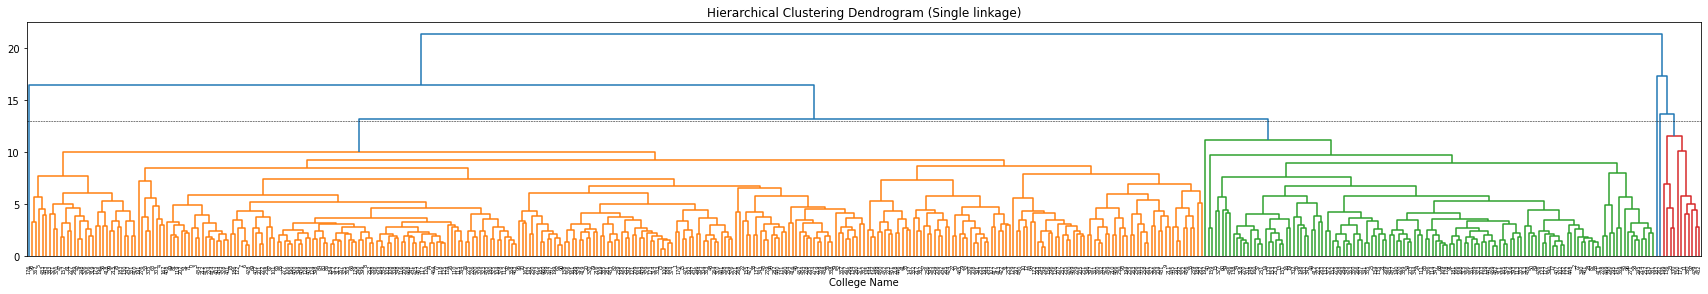

In [106]:
# 덴드로그램

Z = linkage(univ_norm, method='complete') # single / complete / average 
# complete 어느 정도 수준까지 같은 군집으로 볼 것인가

fig = plt.figure(figsize=(30, 5))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')  # 계층적 군집화를 실행하는 덴드로그램
plt.xlabel('College Name')

dendrogram(Z, color_threshold=13) # 어느 정도 수준까지를 같은 군집으로 볼 것이냐를 판단하고 시각화하는 옵션
plt.axhline(y=13, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

 6개로 나눠져 6개의 군집이 가장 합리적이다?

### c

In [107]:
# 각 군집에 대해 요약 통계량 비교

In [220]:
memb = fcluster(linkage(univ_norm, 'complete'), 6, criterion='maxclust')
memb = pd.Series(memb, index=univ_norm.index)

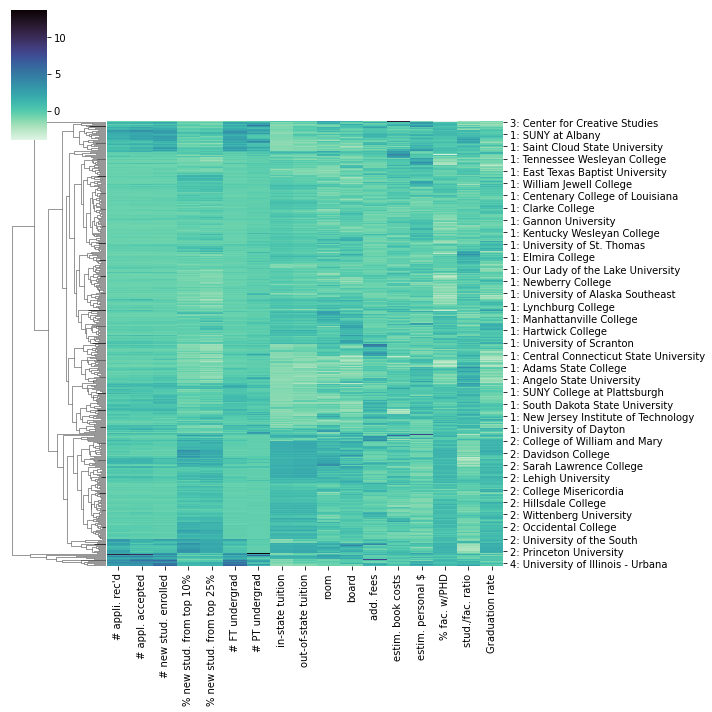

In [221]:
univ_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, univ_norm.index)]
sns.clustermap(univ_norm, method='complete', col_cluster=False,  cmap="mako_r")
plt.show()

In [223]:
univ_norm['cluster']=[' {}'.format(i) for i,company in zip(memb, univ_norm.index)] # 클러스터 변수 생성
grouped= univ_norm.groupby('cluster')

In [224]:
grouped.agg('mean')

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
cluster,,,,,,,,,,,,,,,,,
1,-0.183104,-0.130953,-0.086946,-0.453943,-0.426433,-0.055592,0.048707,-0.396060,-0.447075,-0.229710,-0.262345,-0.080217,-0.055366,0.137784,-0.325413,0.269412,-0.324234
2,0.126661,-0.047599,-0.152147,1.151489,1.054250,-0.224331,-0.388708,1.074683,1.163809,0.543995,0.621277,0.119205,0.034959,-0.442631,0.801581,-0.738667,0.855461
3,-0.625145,-0.665783,-0.630935,-1.461792,-1.754144,-0.650630,-0.306932,0.330512,0.151876,2.274143,1.196165,-0.699782,10.976562,-1.014803,-3.912723,-1.837112,-1.022909
4,2.907958,3.500182,3.778731,0.427310,0.679124,3.717682,1.645813,-0.358179,0.062752,0.424828,0.590598,0.925495,0.088790,0.763121,0.691195,0.524887,-0.010966
5,11.034906,9.692269,4.083835,0.432230,1.148780,3.820346,1.885465,-1.045287,-0.734091,0.783653,-0.239813,1.753462,0.865374,1.022310,1.007577,1.420255,0.630265
6,1.941181,1.731019,2.996063,-0.108919,-0.032070,2.771136,13.610166,-1.130300,-0.377153,-1.013910,0.218853,0.098295,1.012446,2.343721,0.887570,-0.452090,-1.133120


#### d

In [237]:
univ_c=univ_d[['State', 'Public (1)/ Private (2)']]

In [241]:
univ_c['cluster']=[' {}'.format(i) for i,name in zip(memb, univ_norm.index)] # 클러스터 변수 생성
univ_c.groupby('cluster')['State', 'Public (1)/ Private (2)'].value_counts()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23160\1119039490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  univ_c['cluster']=[' {}'.format(i) for i,name in zip(memb, univ_norm.index)] # 클러스터 변수 생성
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23160\1119039490.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  univ_c.groupby('cluster')['State', 'Public (1)/ Private (2)'].value_counts()


cluster  State  Public (1)/ Private (2)
 1       PA     2                          20
         IA     2                          15
         NY     2                          14
         TX     2                          12
         OH     2                          12
                                           ..
 4       IL     1                           1
         CA     2                           1
         AZ     1                           1
 5       NJ     1                           1
 6       MN     1                           1
Length: 136, dtype: int64

#### e

#### f

In [299]:
univ = pd.read_csv('Universities.csv')
univ.set_index('College Name', inplace=True)
univ=univ.drop(columns=['State','Public (1)/ Private (2)'])

In [302]:
univ.loc[['Tufts University']]

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,
Tufts University,7614.0,3605.0,1205.0,60.0,90.0,4598.0,NaN,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


In [303]:
univ_dd[['# PT undergrad']].mean() # 범주형도 드랍하고 결측도 드랍된 데이터 프레임

# PT undergrad    797.454352
dtype: float64

In [304]:
univ['# PT undergrad']['Tufts University']=797.454352 # 평균으로 결측값 대체
univ.loc[['Tufts University']]

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,,
Tufts University,7614.0,3605.0,1205.0,60.0,90.0,4598.0,797.454352,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


In [284]:
tu=univ.loc[['Tufts University']]
tu=tu.drop(columns=['State','Public (1)/ Private (2)', '# PT undergrad'])
tu

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
College Name,,,,,,,,,,,,,,,,
Tufts University,7614.0,3605.0,1205.0,60.0,90.0,4598.0,19701.0,19701.0,3038.0,2930.0,503.0,600.0,928.0,99.0,10.3,92.0


# 15.2 제약 산업

In [181]:
pha = pd.read_csv('Pharmaceuticals.csv')
pha.set_index('Name', inplace=True)

In [182]:
pha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Abbott Laboratories to Wyeth
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Market_Cap             21 non-null     float64
 2   Beta                   21 non-null     float64
 3   PE_Ratio               21 non-null     float64
 4   ROE                    21 non-null     float64
 5   ROA                    21 non-null     float64
 6   Asset_Turnover         21 non-null     float64
 7   Leverage               21 non-null     float64
 8   Rev_Growth             21 non-null     float64
 9   Net_Profit_Margin      21 non-null     float64
 10  Median_Recommendation  21 non-null     object 
 11  Location               21 non-null     object 
 12  Exchange               21 non-null     object 
dtypes: float64(9), object(4)
memory usage: 2.3+ KB


- market_cap
- beta 
- pe_ratio
- net profit margin : 자산 수익률
- asset turnover : 회전율
- leverage
- rev_growth
- 순이윤 폭
- median_recommendation
- loction
- 상장된 주식 거래소

symbol 을 제거하고 시작해야 하나

In [183]:
pha=pha.drop(columns=['Symbol'])

In [184]:
pha.head(3)

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
Name,,,,,,,,,,,,
Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE


In [185]:
print(len(pha)) # 21개의 회사 군집화
print(len(pha.columns)) # 12개의 변수 수집

21
12


### a 

In [186]:
pha_n=pha.iloc[:,0:9] # 1번부터 9번까지의 변수

In [187]:
pha_n.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Name,,,,,,,,,
Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1
"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5
Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2
AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0
Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9


군집 분석을 할 때 여러가지 고려사항 : 

    - 단위가 큰 변수는 두 레코드 간의 총 거리에 매우 큰 영향을 준다. 모두 동일한 단위로 변경할 필요가 있다
    - 서로 강한 상관관계가 있는 변수라면 다른 거리측도를 선택하는 것이 좋다.
    

### b

In [188]:
# 표준정규화
pha_norm = (pha_n - pha_n.mean())/pha_n.std()

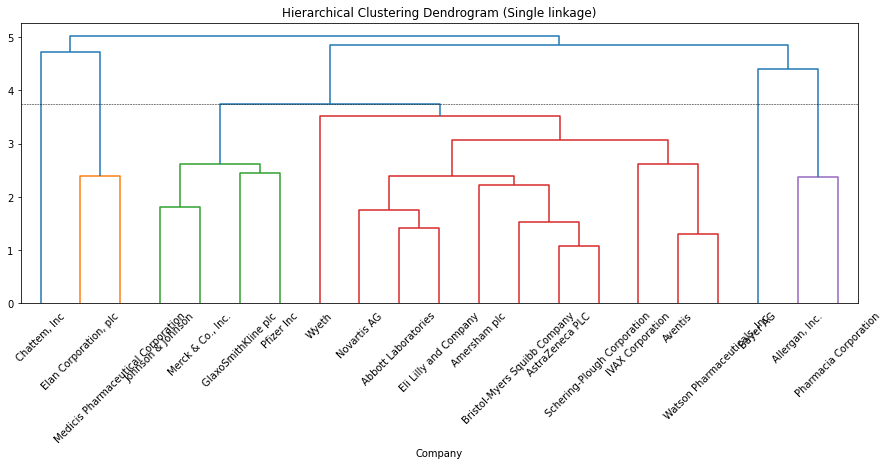

In [189]:
Z = linkage(pha_norm, method='average')

fig = plt.figure(figsize=(15, 6))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')

dendrogram(Z, labels=pha_norm.index, color_threshold=3.75)
plt.axhline(y=3.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

6개의 군집으로 나누는 것이 적절?

In [190]:
memb = fcluster(linkage(pha_norm, 'average'), 6, criterion='maxclust')
memb = pd.Series(memb, index = pha_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Elan Corporation, plc, Medicis Pharmaceutical Corporation
2 :  Chattem, Inc
3 :  GlaxoSmithKline plc, Johnson & Johnson, Merck & Co., Inc., Pfizer Inc
4 :  Abbott Laboratories, Amersham plc, AstraZeneca PLC, Aventis, Bristol-Myers Squibb Company, Eli Lilly and Company, IVAX Corporation, Novartis AG, Schering-Plough Corporation, Watson Pharmaceuticals, Inc., Wyeth
5 :  Allergan, Inc., Pharmacia Corporation
6 :  Bayer AG


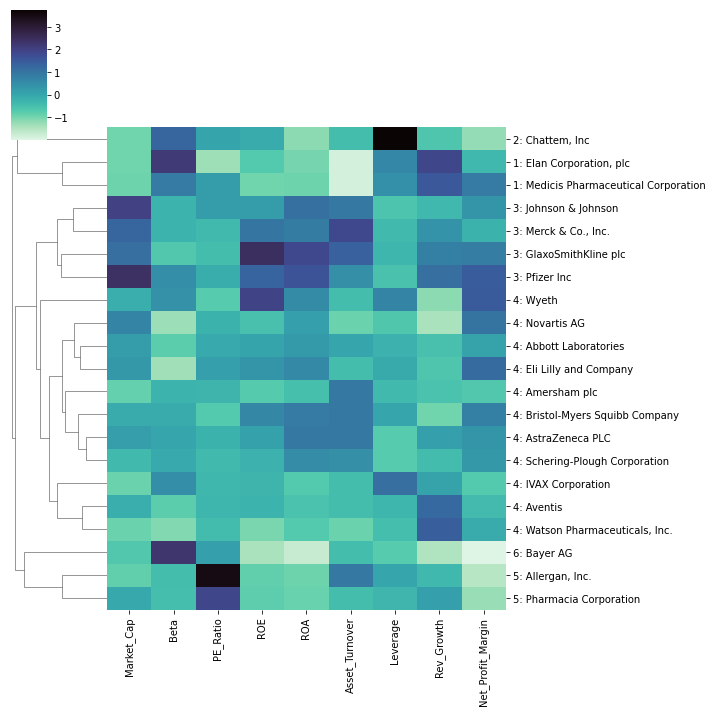

In [95]:
pha_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, pha_norm.index)]
sns.clustermap(pha_norm, method='average', col_cluster=False,  cmap="mako_r")
plt.show()

### c

In [209]:
pha_c=pha.iloc[:,9:12]
pha_c['cluster']=[' {}'.format(i) for i,company in zip(memb, pha_n.index)] # 클러스터 변수 생성
grouped= pha_c.groupby('cluster')

In [210]:
grouped['Median_Recommendation'].value_counts()

cluster  Median_Recommendation
 1       Moderate Buy             1
         Moderate Sell            1
 2       Moderate Buy             1
 3       Hold                     2
         Moderate Buy             2
 4       Hold                     5
         Moderate Sell            3
         Moderate Buy             2
         Strong Buy               1
 5       Hold                     1
         Moderate Buy             1
 6       Hold                     1
Name: Median_Recommendation, dtype: int64

In [ ]:
# 얜 군집화한 클러스터에 대해 합쳐지지 않고 따로노네

In [211]:
grouped['Location'].value_counts()

cluster  Location   
 1       IRELAND        1
         US             1
 2       US             1
 3       US             3
         UK             1
 4       US             7
         UK             2
         FRANCE         1
         SWITZERLAND    1
 5       CANADA         1
         US             1
 6       GERMANY        1
Name: Location, dtype: int64

In [212]:
grouped['Exchange'].value_counts()

cluster  Exchange
 1       NYSE         2
 2       NASDAQ       1
 3       NYSE         4
 4       NYSE        10
         AMEX         1
 5       NYSE         2
 6       NYSE         1
Name: Exchange, dtype: int64

### d

In [217]:
pha_n['cluster']=[' {}'.format(i) for i,company in zip(memb, pha_n.index)] # 클러스터 변수 생성
grouped= pha_n.groupby('cluster')

In [218]:
grouped['Market_Cap'].value_counts()

cluster  Market_Cap
 1       0.78          1
         1.20          1
 2       0.41          1
 3       122.11        1
         132.56        1
         173.93        1
         199.47        1
 4       2.60          1
         3.26          1
         6.30          1
         34.10         1
         47.16         1
         48.19         1
         51.33         1
         67.63         1
         68.44         1
         73.84         1
         96.65         1
 5       7.58          1
         56.24         1
 6       16.90         1
Name: Market_Cap, dtype: int64

# 15.3 아침용 시리얼에 대한 고객 평점

In [132]:
cer_df = pd.read_csv('Cereals.csv')
cer_df.set_index('name', inplace=True) # 영양 정보, 매장의 진열 상태, 고객의 평점

In [133]:
cer=cer_df.dropna()

In [134]:
cer.head(5) # 전처리된 형태

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541


In [138]:
cer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 100%_Bran to Wheaties_Honey_Gold
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mfr       74 non-null     object 
 1   type      74 non-null     object 
 2   calories  74 non-null     int64  
 3   protein   74 non-null     int64  
 4   fat       74 non-null     int64  
 5   sodium    74 non-null     int64  
 6   fiber     74 non-null     float64
 7   carbo     74 non-null     float64
 8   sugars    74 non-null     float64
 9   potass    74 non-null     float64
 10  vitamins  74 non-null     int64  
 11  shelf     74 non-null     int64  
 12  weight    74 non-null     float64
 13  cups      74 non-null     float64
 14  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(2)
memory usage: 9.2+ KB


In [140]:
cer=cer.drop(columns=['mfr','type'])

### a

In [142]:
# 정규화된 변수로 유클리드 거리 사용 
cer_norm = cer.apply(preprocessing.scale, axis=0)

d_norm = pairwise.pairwise_distances(cer_norm, metric='euclidean')

In [143]:
# single

memb = fcluster(linkage(cer_norm, 'single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=cer_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Puffed_Rice, Puffed_Wheat
2 :  100%_Bran, All-Bran
3 :  All-Bran_with_Extra_Fiber
4 :  Just_Right_Crunchy__Nuggets, Just_Right_Fruit_&_Nut, Product_19, Total_Corn_Flakes, Total_Raisin_Bran, Total_Whole_Grain
5 :  Apple_Cinnamon_Cheerios, Apple_Jacks, Basic_4, Bran_Chex, Bran_Flakes, Cap'n'Crunch, Cheerios, Cinnamon_Toast_Crunch, Clusters, Cocoa_Puffs, Corn_Chex, Corn_Flakes, Corn_Pops, Count_Chocula, Cracklin'_Oat_Bran, Crispix, Crispy_Wheat_&_Raisins, Double_Chex, Froot_Loops, Frosted_Flakes, Frosted_Mini-Wheats, Fruit_&_Fibre_Dates,_Walnuts,_and_Oats, Fruitful_Bran, Fruity_Pebbles, Golden_Crisp, Golden_Grahams, Grape_Nuts_Flakes, Grape-Nuts, Great_Grains_Pecan, Honey_Graham_Ohs, Honey_Nut_Cheerios, Honey-comb, Kix, Life, Lucky_Charms, Maypo, Muesli_Raisins,_Dates,_&_Almonds, Muesli_Raisins,_Peaches,_&_Pecans, Mueslix_Crispy_Blend, Multi-Grain_Cheerios, Nut&Honey_Crunch, Nutri-Grain_Almond-Raisin, Nutri-grain_Wheat, Oatmeal_Raisin_Crisp, Post_Nat._Raisin_Bran, Quaker_Oat_Squares,

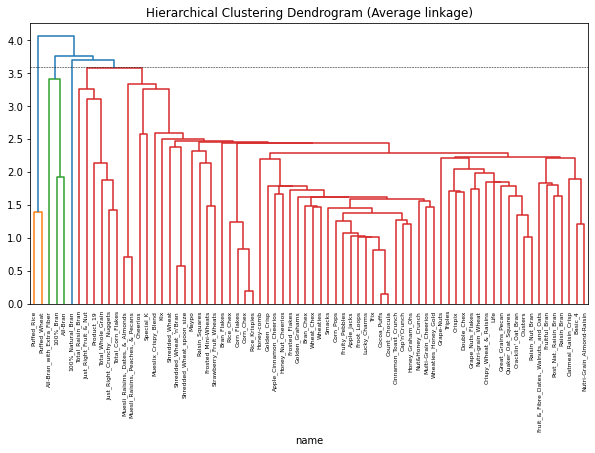

In [145]:
Z = linkage(cer_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('name')

dendrogram(Z, labels=cer_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [147]:
# 완전연결법

memb = fcluster(linkage(cer_norm, 'complete'), 6, criterion='maxclust')
memb = pd.Series(memb, index=cer_norm.index)

for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Basic_4, Fruit_&_Fibre_Dates,_Walnuts,_and_Oats, Fruitful_Bran, Just_Right_Fruit_&_Nut, Muesli_Raisins,_Dates,_&_Almonds, Muesli_Raisins,_Peaches,_&_Pecans, Mueslix_Crispy_Blend, Nutri-Grain_Almond-Raisin, Oatmeal_Raisin_Crisp, Post_Nat._Raisin_Bran, Raisin_Bran, Total_Raisin_Bran
2 :  Cheerios, Corn_Chex, Corn_Flakes, Crispix, Double_Chex, Just_Right_Crunchy__Nuggets, Kix, Product_19, Rice_Chex, Rice_Krispies, Special_K, Total_Corn_Flakes, Total_Whole_Grain, Triples
3 :  Apple_Cinnamon_Cheerios, Apple_Jacks, Bran_Chex, Bran_Flakes, Cap'n'Crunch, Cinnamon_Toast_Crunch, Clusters, Cocoa_Puffs, Corn_Pops, Count_Chocula, Cracklin'_Oat_Bran, Crispy_Wheat_&_Raisins, Froot_Loops, Frosted_Flakes, Fruity_Pebbles, Golden_Crisp, Golden_Grahams, Grape_Nuts_Flakes, Grape-Nuts, Great_Grains_Pecan, Honey_Graham_Ohs, Honey_Nut_Cheerios, Honey-comb, Life, Lucky_Charms, Multi-Grain_Cheerios, Nut&Honey_Crunch, Nutri-grain_Wheat, Quaker_Oat_Squares, Raisin_Nut_Bran, Smacks, Trix, Wheat_Chex, Wheaties

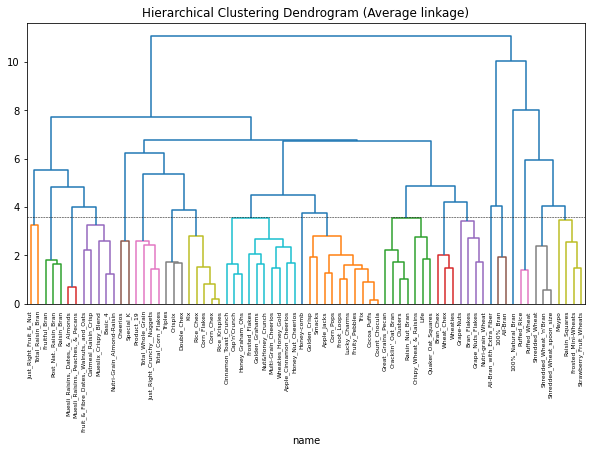

In [148]:
Z = linkage(cer_norm, method='complete')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('name')

dendrogram(Z, labels=cer_norm.index, color_threshold=3.6)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

### b

In [ ]:
# 싱글 선택

### c

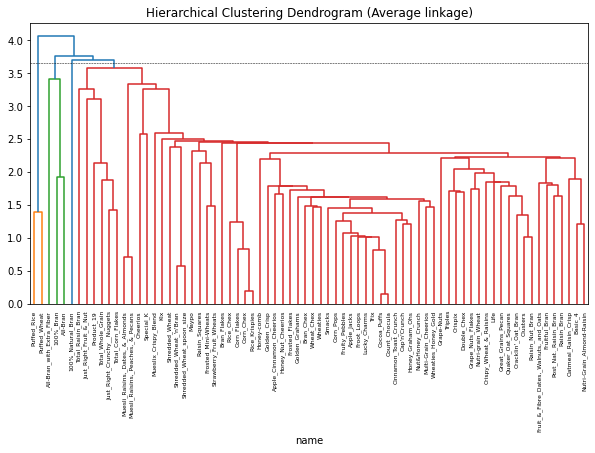

In [172]:
Z = linkage(cer_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('name')

dendrogram(Z, labels=cer_norm.index, color_threshold=3.65)
plt.axhline(y=3.65, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [ ]:
# 군집의 수는 4

### d

In [173]:
# 정규화가 필요하다
# -> 어떤 데이터를 사용하면 .. 좋은건지..?

cer_norm['cluster'] = ['Cluster {}'.format(i) for i in cer_norm.index]

# 15.4 항공사 상용고객 마케팅

In [149]:
ewa_df = pd.read_csv('EastWestAirlinesNN.csv')

In [150]:
ewa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4987 entries, 0 to 4986
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                4985 non-null   float64
 1   Topflight          4985 non-null   float64
 2   Balance            4985 non-null   float64
 3   Qual_miles         4985 non-null   float64
 4   cc1_miles?         4985 non-null   float64
 5   cc2_miles?         4985 non-null   float64
 6   cc3_miles?         4985 non-null   float64
 7   Bonus_miles        4986 non-null   float64
 8   Bonus_trans        4986 non-null   float64
 9   Flight_miles_12mo  4985 non-null   float64
 10  Flight_trans_12    4985 non-null   float64
 11  Online_12          4985 non-null   float64
 12  Email              4985 non-null   float64
 13  Club_member        4985 non-null   float64
 14  Any_cc_miles_12mo  4985 non-null   float64
 15  Phone_sale         4985 non-null   float64
dtypes: float64(16)
memory us

In [151]:
ewa_df.set_index('ID#', inplace=True)

In [156]:
ewa=ewa_df.dropna()

### a

In [161]:
d = pairwise.pairwise_distances(ewa, metric='euclidean')

In [162]:
# pandas uses sample standard deviation
ewa_norm = (ewa - ewa.mean())/ewa.std()

# compute normalized distance based on Sales and Fuel Cost
d_norm = pairwise.pairwise_distances(ewa_norm, 
                                     metric='euclidean')


In [165]:
Z = linkage(ewa_norm, method='ward')

fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('ID')

dendrogram(Z, labels=ewa_norm.index, color_threshold=50)
plt.axhline(y=50, color='black', linewidth=0.5, linestyle='dashed')
plt.show()  # 왜 이 부분에서 계속 실행이 되지 않지

KeyboardInterrupt: 

### b

In [ ]:
# 데이터 정규화가 필요할 것으로 예상 

In [166]:
Z = linkage(ewa, method='ward')

fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(bottom=0.23)

plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('ID')

dendrogram(Z, labels=ewa.index, color_threshold=50)
plt.axhline(y=50, color='black', linewidth=0.5, linestyle='dashed')
plt.show()  # 왜 이 부분에서 계속 실행이 되지 않지

KeyboardInterrupt: 

### c

### d

### e

### f